# Kaggle Titanic First Competition

https://www.kaggle.com/c/titanic/overview

## Exploratory Data Analysis

There were an estimated 2,224 passengers and crew aboard the RMS Titanic.  Over 1500 peopled died.  Survival percentage 32.5%.

**Initialization**

In [1]:
%run init.ipynb

In [2]:
from data.data import ExtractData, TransformData
from zeetle.data import eda
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

## Extract Data

In [3]:
train = ExtractData('../data/raw/train.csv')
holdout = ExtractData('../data/raw/holdout.csv')

Xy_raw_train = train.Xy_raw
Xy_raw_holdout = holdout.Xy_raw

In [4]:
Xy_train = TransformData(train)
Xy_holdout = TransformData(holdout)

In [5]:
df_nan_inspect = pd.concat([Xy_train.Xy.isna().sum().to_frame().drop('survived', axis=0),
                            Xy_holdout.Xy.isna().sum().to_frame()], axis=1)

df_nan_inspect.columns = ['Xy_train', 'Xy_holdout']

with pd.option_context('display.max_rows', 22):
	df_nan_inspect

,Xy_train,Xy_holdout
pclass,0,0
name,0,0
sex,0,0
age_known,177,86
sibsp,0,0
parch,0,0
ticket,0,0
fare,0,0
cabin,687,327
embarked,0,0


## How large is the data set?

The training data contains 891 rows, 10 features, and 1 label (survived). 
The training data contains 418 rows, 10 features. 

## Is there missing data?

The first models that I will use are based upon logistic regression. Logistic regression is unable to handle missing data. I will need to clean the data either by removing missing data (column or row) or imputing missing values. 


In [7]:
Xy_raw_train.notna().astype(int).mean().to_frame().T
Xy_raw_holdout.notna().astype(int).mean().to_frame().T

,survived,pclass,name,sex,age_known,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,1.0,1.0,0.801347,1.0,1.0,1.0,1.0,0.228956,0.997755


,pclass,name,sex,age_known,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,1.0,0.794258,1.0,1.0,1.0,0.997608,0.217703,1.0


#### Missing embarked data

There are two passengers that have  embarked from unknown locations in the training data. These passengers
are travelling alone so we will fill in with the most common embark location (S).

In [8]:
train.Xy_raw.embarked.value_counts().to_frame()

,embarked
S,644
C,168
Q,77


**List of passengers with unknown embarkment**

In [9]:
train.Xy_raw[train.Xy_raw['embarked'].isna()]
holdout.Xy_raw[holdout.Xy_raw['embarked'].isna()]

,survived,pclass,name,sex,age_known,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,pclass,name,sex,age_known,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,


**Verify that unknown embarkment is filled in with 'S'**

In [10]:
with pd.option_context('display.max_rows', 21):
	Xy_train.Xy.loc[[62,830]].T

passengerid,62,830
survived,1,1
pclass,1,1
name,"Icard, Miss. Amelie","Stone, Mrs. George Nelson (Martha Evelyn)"
sex,female,female
age_known,38,62
...,...,...
age,38,62
age_bin,adult,senior
fare_bin,q4,q4
is_child,False,False


## Explore Data Relationships

In [25]:
Xy_train = Xy_train.Xy
Xy_holdout = Xy_holdout.Xy

**How many passengers travelled for free (fare = 0)?**

In [26]:
with pd.option_context('display.max_rows', 20):
	Xy_train[Xy_train.fare == 0][['pclass', 'sex', 'age_known', 'fare', 'title', 'last_name']].sort_values(by='last_name')

,pclass,sex,age_known,fare,title,last_name
passengerid,,,,,,
807,1,0,39.0,0.0,Mr,Andrews
467,2,0,NaN,0.0,Mr,Campbell
414,2,0,NaN,0.0,Mr,Cunningham
482,2,0,NaN,0.0,Mr,Frost
816,1,0,NaN,0.0,Mr,Fry
264,1,0,40.0,0.0,Mr,Harrison
303,3,0,19.0,0.0,Mr,Johnson
598,3,0,49.0,0.0,Mr,Johnson
733,2,0,NaN,0.0,Mr,Knight


In [27]:
with pd.option_context('display.max_rows', 20):
	Xy_holdout[Xy_holdout.fare == 0][['pclass', 'sex', 'age_known', 'fare', 'title', 'last_name']].sort_values(by='last_name')

,pclass,sex,age_known,fare,title,last_name
passengerid,,,,,,
1158,1,male,NaN,0.0,Mr,Chisholm
1264,1,male,49.0,0.0,Mr,Ismay


## Correlation

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [11]:
Xy_train.Xy['sex'] = Xy_train.Xy['sex'].map({'male':0, 'female':1})

<Figure size 864x720 with 0 Axes>

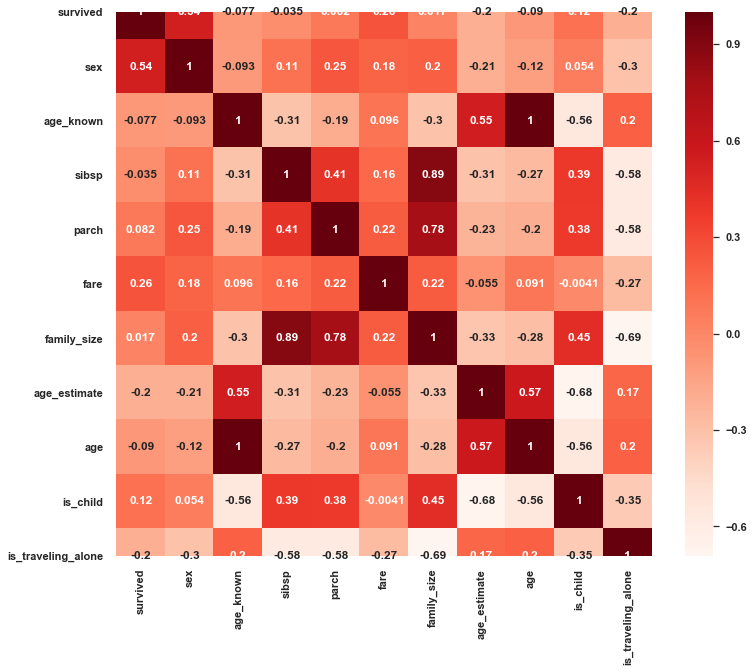

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = Xy_train.Xy.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
#Correlation with output variable
cor_target = abs(cor["survived"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1].sort_values(ascending=False)
relevant_features

survived              1.000000
sex                   0.543351
fare                  0.257307
age_estimate          0.204613
is_traveling_alone    0.203367
is_child              0.117636
Name: survived, dtype: float64

## by Group

In [129]:
Xy_raw_train.groupby(['sex']).survived.mean().to_frame().T
Xy_raw_train.groupby(['pclass']).survived.mean().to_frame().T
Xy_raw_train.groupby(['pclass']).survived.mean().to_frame().T

sex,female,male
survived,0.742038,0.188908


pclass,1,2,3
survived,0.62963,0.472826,0.242363


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,last_name,cabin_number,cabin_prefix
passengerid,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,21171,A/5
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,17599,PC
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,3101282,STON/O2.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,113803,NaN
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,373450,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Montvila,211536,NaN
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Graham,112053,NaN
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Johnston,6607,W./C.


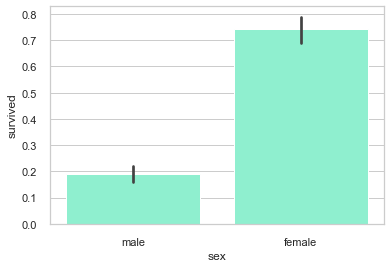

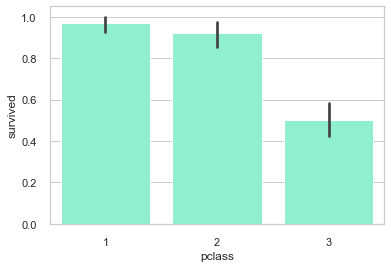

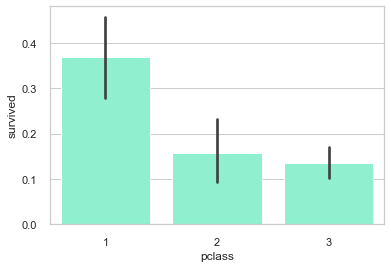

In [119]:
Xy

sns.barplot('sex', 'survived', data=Xy, color="aquamarine")
plt.show()

sns.barplot('pclass', 'survived', data=Xy[Xy.sex=='female'], color="aquamarine")
plt.show()

sns.barplot('pclass', 'survived', data=Xy[Xy.sex=='male'], color="aquamarine")
plt.show()

### How complete is the data?

* The survived (labels) columns is complete.
* age feature is 80.1% complete. 
* cabin feature is 20.4% complete
* embarked feature is 99.8% complete
* All the other columns are 100% complete. 

Based upon the above,  the recommendations for the initial analysis should not include age and cabin features.  There are 2 passengers where they embarked are unknown.  Recommend discarding these passengers.  Also passenger's name seems unlikely to change the outcome of whether a passenger survives so this information will be discarded as well for the initial analysis. Recommend including the ticket number for now. It is complete and the ticket numbers are not unique among the passengers. 



In [57]:
display(Markdown('### Count of data that contains a value (i.e. notna() == True)'))
eda.stat_nan(Xy_raw_df, fraction=False)

display(Markdown('### Fraction of data that contains a value(i.e. notna() == True)'))
eda.stat_nan(Xy_raw_df, fraction=True)

### Count of data that contains a value (i.e. notna() == True)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
True,891,891,891,891,714,891,891,891,891,204,889
False,0,0,0,0,177,0,0,0,0,687,2
Total,891,891,891,891,891,891,891,891,891,891,891


### Fraction of data that contains a value(i.e. notna() == True)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
True,1.0,1.0,1.0,1.0,0.801,1.0,1.0,1.0,1.0,0.229,0.998
False,0.0,0.0,0.0,0.0,0.199,0.0,0.0,0.0,0.0,0.771,0.002
Total,1.0,1.0,1.0,1.0,1.000,1.0,1.0,1.0,1.0,1.000,1.000


The figure below shows missing data for each feature and label (survived).

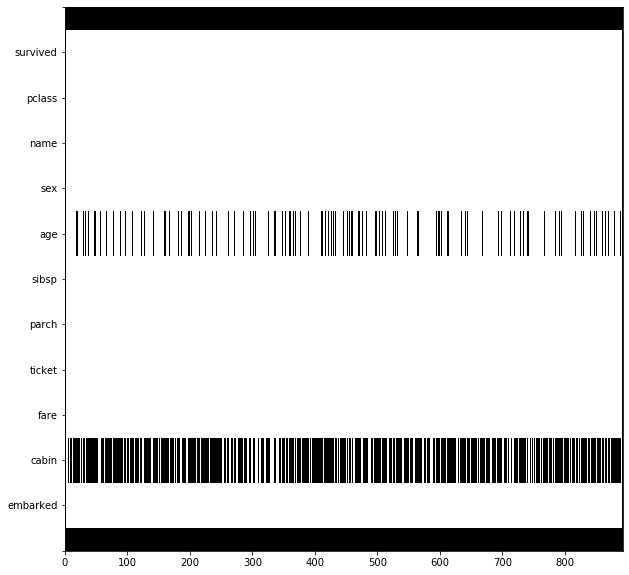

In [45]:
eda.plot_nan(Xy_raw_df)

### Pandas Profiling

In [60]:
profile = Xy_raw_df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="../docs/_profiling/pandas_profiling.html")

### Clean data

In [65]:
Xy_df = data.Xy

In [66]:
Xy_df.shape

display(Markdown('### Count of data that contains a value (i.e. notna() == True)'))
eda.stat_nan(Xy_df, fraction=False)

display(Markdown('### Fraction of data that contains a value(i.e. notna() == True)'))
eda.stat_nan(Xy_df, fraction=True)

(889, 7)

### Count of data that contains a value (i.e. notna() == True)

,survived,pclass,sex,sibsp,parch,fare,embarked
True,889,889,889,889,889,889,889
False,0,0,0,0,0,0,0
Total,889,889,889,889,889,889,889


### Fraction of data that contains a value(i.e. notna() == True)

,survived,pclass,sex,sibsp,parch,fare,embarked
True,1.0,1.0,1.0,1.0,1.0,1.0,1.0
False,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## How important is pclass?

## Ticket Number

In [90]:
with pd.option_context('display.max_rows', 300):
    Xy_raw_df[Xy_raw_df.duplicated(subset='ticket', keep=False)].sort_values(by='ticket')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...
737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S
148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S


# Scatter Plot Matrix

In [79]:
Xy_raw_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
Xy_raw_df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


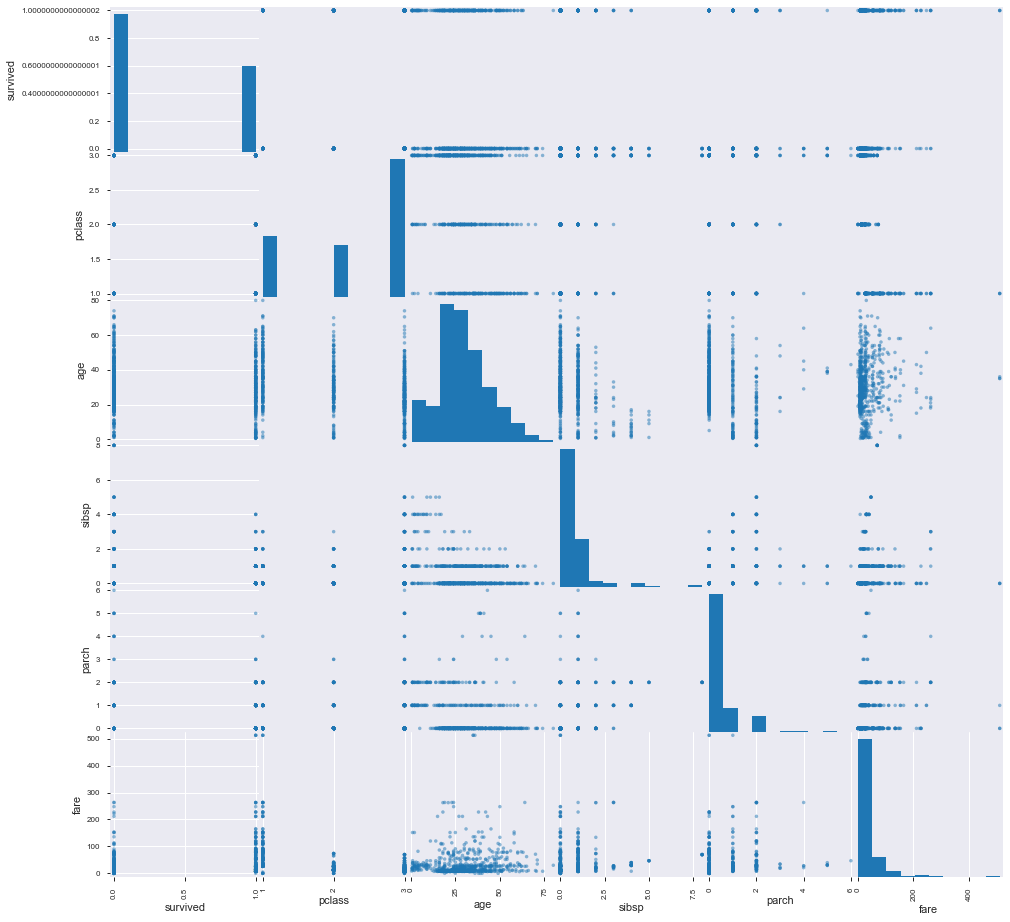

In [78]:
scatter_matrix(Xy_raw_df, figsize=(16,16));

### Correlation of Fare with Family Size

There was one Kaggle Kernel that adjusted the fare by the family size. If this was necessary then I would expect that fare would increase as family size increases. Since this does not seem to be the case I am not going to modify the fare feature by family size. 


plt.scatter(Xy_train.Xy.family_size, Xy_train.Xy.fare);

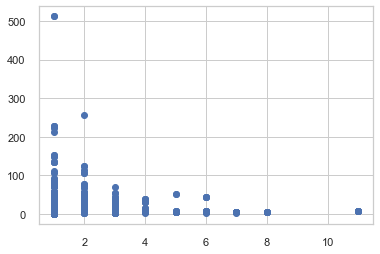

In [48]:
plt.scatter(Xy_train.Xy.family_size, Xy_train.Xy.fare/Xy_train.Xy.family_size);

In [ ]:
plt.plot(Xy.fare, )

### EDA by Title in Name

In [8]:
from nameparser import HumanName

In [5]:
Xy_raw_train = train.Xy_raw
Xy_raw_train['data_source'] = 'train'
Xy_raw_holdout = holdout.Xy_raw
Xy_raw_holdout['data_source'] = 'holdout'

Xy_raw = pd.concat([Xy_raw_train, Xy_raw_holdout])

In [53]:
title_translator = {
        "Mlle.": "Miss.",
        "Mme.": "Miss.",
        "Sir.": "Mr.",
        "Ms.": "Mrs.",
        "Rev.": "Mr.",
        "Col.": "Mr.",
        "Capt.": "Mr.",
        "Lady.": "Miss.",    
        "the Countess. of": "Mrs.",
        "Dr.":np.nan,
    }


In [60]:
Xy_raw['title'] = (Xy_raw.name.apply(lambda x: HumanName(x).title)
                 .replace(title_translator)
                 .replace({"\.": ""}, regex=True)
                 .replace({"":np.nan})
                 .fillna(Xy_raw['sex'])
                 .replace({'female':'Mrs', 'male':'Mr'})
                )

In [61]:
with pd.option_context('display.max_rows', 40):
    Xy_raw.title.value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master'], dtype='object')

In [58]:
with pd.option_context('display.max_rows', 20):
	Xy_raw.groupby(['sex', 'title']).agg({'age_known':['count', 'mean', 'std']})

age_known                      
                  count       mean        std
sex    title                                 
female Miss         214  21.927991  12.267735
       Mrs          174  37.000000  12.807151
male   Master        53   5.482642   4.161554
       Mr           605  32.784298  12.657066

### EDA by Ticket

In [103]:
Xy['cabin_number'] = Xy.ticket.str.extract('(\d+)$')
Xy['cabin_prefix'] = Xy.ticket.str.extract('^(.+) ')

In [106]:
Xy['cabin_prefix'].value_counts().sum()

226

NameError: name 'sns' is not defined